<a href="https://colab.research.google.com/github/monika-chivate/exam/blob/main/8_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Not required if loading pre-built keras dataset
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

In [4]:
# Scale pixel values to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train = X_train.reshape(len(X_train), 28*28)
X_test = X_test.reshape(len(X_test), 28*28)

In [7]:
X_train.shape

(60000, 784)

In [8]:
# Creating Autoencoder Model
input_layer = Input(shape=(28*28,))
encoder_layer = Dense(512, activation="leaky_relu")(input_layer)
decoder_layer = Dense(28*28, activation="sigmoid")(encoder_layer)

autoencoder_model = Model(input_layer, decoder_layer)

In [9]:
model = Sequential()
model.add(Dense(512, input_shape=(28*28,), activation="leaky_relu"))
#model.add(Dense(32, activation="elu"))
model.add(Dense(28*28, activation="sigmoid"))


In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)
early_stopping_callback = EarlyStopping(patience=10)


In [11]:
history = model.fit(
    X_train,
    X_train,
    batch_size=32,
    epochs=1,
    callbacks=[early_stopping_callback],
    validation_data = (X_test, X_test)
)

1875/1875 [==============================] - 34s 18ms/step - loss: 0.2832 - accuracy: 0.0425 - val_loss: 0.2634 - val_accuracy: 0.0726


In [12]:
X_test[0].shape

(784,)

In [13]:

y_pred = model.predict(np.expand_dims(X_test[0], 0))

1/1 [==============================] - 0s 84ms/step


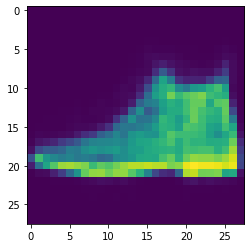

In [14]:
plt.imshow(y_pred.reshape(28, 28))
plt.show()

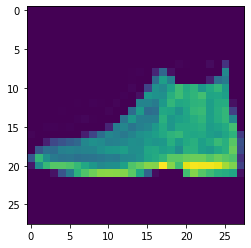

In [15]:
plt.imshow(X_test[0].reshape(28,28))

In [16]:
autoencoder_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)
early_stopping_callback = EarlyStopping(patience=10)

In [17]:
history = autoencoder_model.fit(
    X_train,
    X_train,
    batch_size=32,
    epochs=10,
    callbacks=[early_stopping_callback],
    validation_data = (X_test, X_test)
)

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2824 - accuracy: 0.0433 - val_loss: 0.2634 - val_accuracy: 0.0652
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2582 - accuracy: 0.0946 - val_loss: 0.2577 - val_accuracy: 0.1227
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2543 - accuracy: 0.1328 - val_loss: 0.2553 - val_accuracy: 0.1489
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2524 - accuracy: 0.1676 - val_loss: 0.2539 - val_accuracy: 0.1803
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2512 - accuracy: 0.1945 - val_loss: 0.2529 - val_accuracy: 0.2032
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2505 - accuracy: 0.2128 - val_loss: 0.2523 - val_accuracy: 0.2247
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2499 - accuracy: 0.2314 - val_loss: 0.2518 -

In [18]:
model.predict

<bound method Model.predict of <keras.engine.sequential.Sequential object at 0x7f1bfcbfc580>>

In [19]:
# Creating speparate encoder model
encoder_model = Model(input_layer, encoder_layer)

# Creating separate decoder model
decoder_input = Input(shape=(32,))
decoder_layer2 = Dense(28*28, activation="sigmoid")(decoder_input)
decoder_model = Model(decoder_input, decoder_layer2)

In [20]:
import matplotlib.pyplot as plt

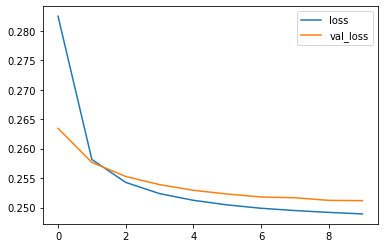

In [21]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

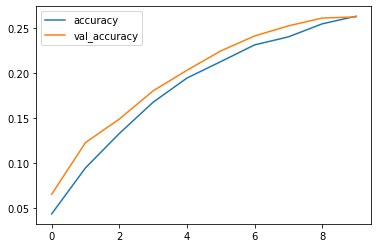

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()